# Reading data

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../dataset/disease-symptoms.csv')

In [3]:
df.head()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
2,Eczema,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
3,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
4,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive


In [4]:
df.shape

(349, 10)

In [5]:
df.dtypes

Disease                 object
Fever                   object
Cough                   object
Fatigue                 object
Difficulty Breathing    object
Age                      int64
Gender                  object
Blood Pressure          object
Cholesterol Level       object
Outcome Variable        object
dtype: object

In [6]:
df.isnull().sum()

Disease                 0
Fever                   0
Cough                   0
Fatigue                 0
Difficulty Breathing    0
Age                     0
Gender                  0
Blood Pressure          0
Cholesterol Level       0
Outcome Variable        0
dtype: int64

In [7]:
df.describe()

,Age
count,349.000000
mean,46.323782
std,13.085090
min,19.000000
25%,35.000000
50%,45.000000
75%,55.000000
max,90.000000


# Preprocessing

In [8]:
import matplotlib.pyplot as plt

In [9]:
boolean_columns = ['Fever', 'Cough', 'Fatigue', 'Difficulty Breathing']

In [10]:
def to_boolean(columns: list):
    for col in columns:
        df[col] = df[col].replace({'Yes': True, 'No' : False})

In [11]:
to_boolean(boolean_columns)

/tmp/ipykernel_18351/1785398916.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace({'Yes': True, 'No' : False})


In [12]:
df[boolean_columns]

,Fever,Cough,Fatigue,Difficulty Breathing
0,True,False,True,True
1,False,True,True,False
2,False,True,True,False
3,True,True,False,True
4,True,True,False,True
...,...,...,...,...
344,True,False,True,False
345,True,False,True,False
346,True,False,True,False
347,True,False,True,False


In [13]:
df[boolean_columns].dtypes

Fever                   bool
Cough                   bool
Fatigue                 bool
Difficulty Breathing    bool
dtype: object

In [14]:
df['Blood Pressure'].unique()

array(['Low', 'Normal', 'High'], dtype=object)

In [15]:
df['Cholesterol Level'].unique()

array(['Normal', 'Low', 'High'], dtype=object)

In [16]:
def to_numeric(columns: list):
    for col in columns:
        df[col] = df[col].replace({'Low' : 0, 'Normal': 1, 'High': 2})

In [17]:
to_numeric(['Blood Pressure', 'Cholesterol Level'])

/tmp/ipykernel_18351/3320431781.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace({'Low' : 0, 'Normal': 1, 'High': 2})


In [18]:
df[['Blood Pressure', 'Cholesterol Level']]

,Blood Pressure,Cholesterol Level
0,0,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
344,2,2
345,2,2
346,2,2
347,2,2


In [19]:
df[['Blood Pressure', 'Cholesterol Level']].dtypes

Blood Pressure       int64
Cholesterol Level    int64
dtype: object

In [20]:
df['Gender'] = df['Gender'].replace({'Male': 1, 'Female' : 0})

/tmp/ipykernel_18351/3126810659.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'] = df['Gender'].replace({'Male': 1, 'Female' : 0})


In [21]:
df['Gender']

0      0
1      0
2      0
3      1
4      1
      ..
344    0
345    1
346    1
347    0
348    0
Name: Gender, Length: 349, dtype: int64

In [22]:
df_positive = df[df['Outcome Variable'] == 'Positive']

In [23]:
df_positive

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,True,False,True,True,19,0,0,1,Positive
3,Asthma,True,True,False,True,25,1,1,1,Positive
4,Asthma,True,True,False,True,25,1,1,1,Positive
5,Eczema,True,False,False,False,25,0,1,1,Positive
6,Influenza,True,True,True,True,25,0,1,1,Positive
...,...,...,...,...,...,...,...,...,...,...
344,Stroke,True,False,True,False,80,0,2,2,Positive
345,Stroke,True,False,True,False,85,1,2,2,Positive
346,Stroke,True,False,True,False,85,1,2,2,Positive
347,Stroke,True,False,True,False,90,0,2,2,Positive


# Fitting the model

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import numpy as np
import matplotlib.pyplot as plt

In [25]:
# ISSUE: The prediction must output disease name which is positive. How do achieve that?

features = ['Fever', 'Cough', 'Fatigue', 'Difficulty Breathing', 'Age', 'Gender', 'Blood Pressure', 'Cholesterol Level'] 
target = 'Disease'
X, y = df_positive[features], df_positive[target]
X_train, X_test, y_train, y_test = train_test_split(X, y) 

In [33]:
model = DecisionTreeClassifier(random_state=1)
# model = RandomForestClassifier()
# model = GradientBoostingClassifier()

In [34]:
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [35]:
y_pred = model.predict(X_test)

In [36]:
y_pred[:5]

array(['Stroke', 'Lymphoma', 'Hemophilia', 'Hypothyroidism', 'Eczema'],
      dtype=object)

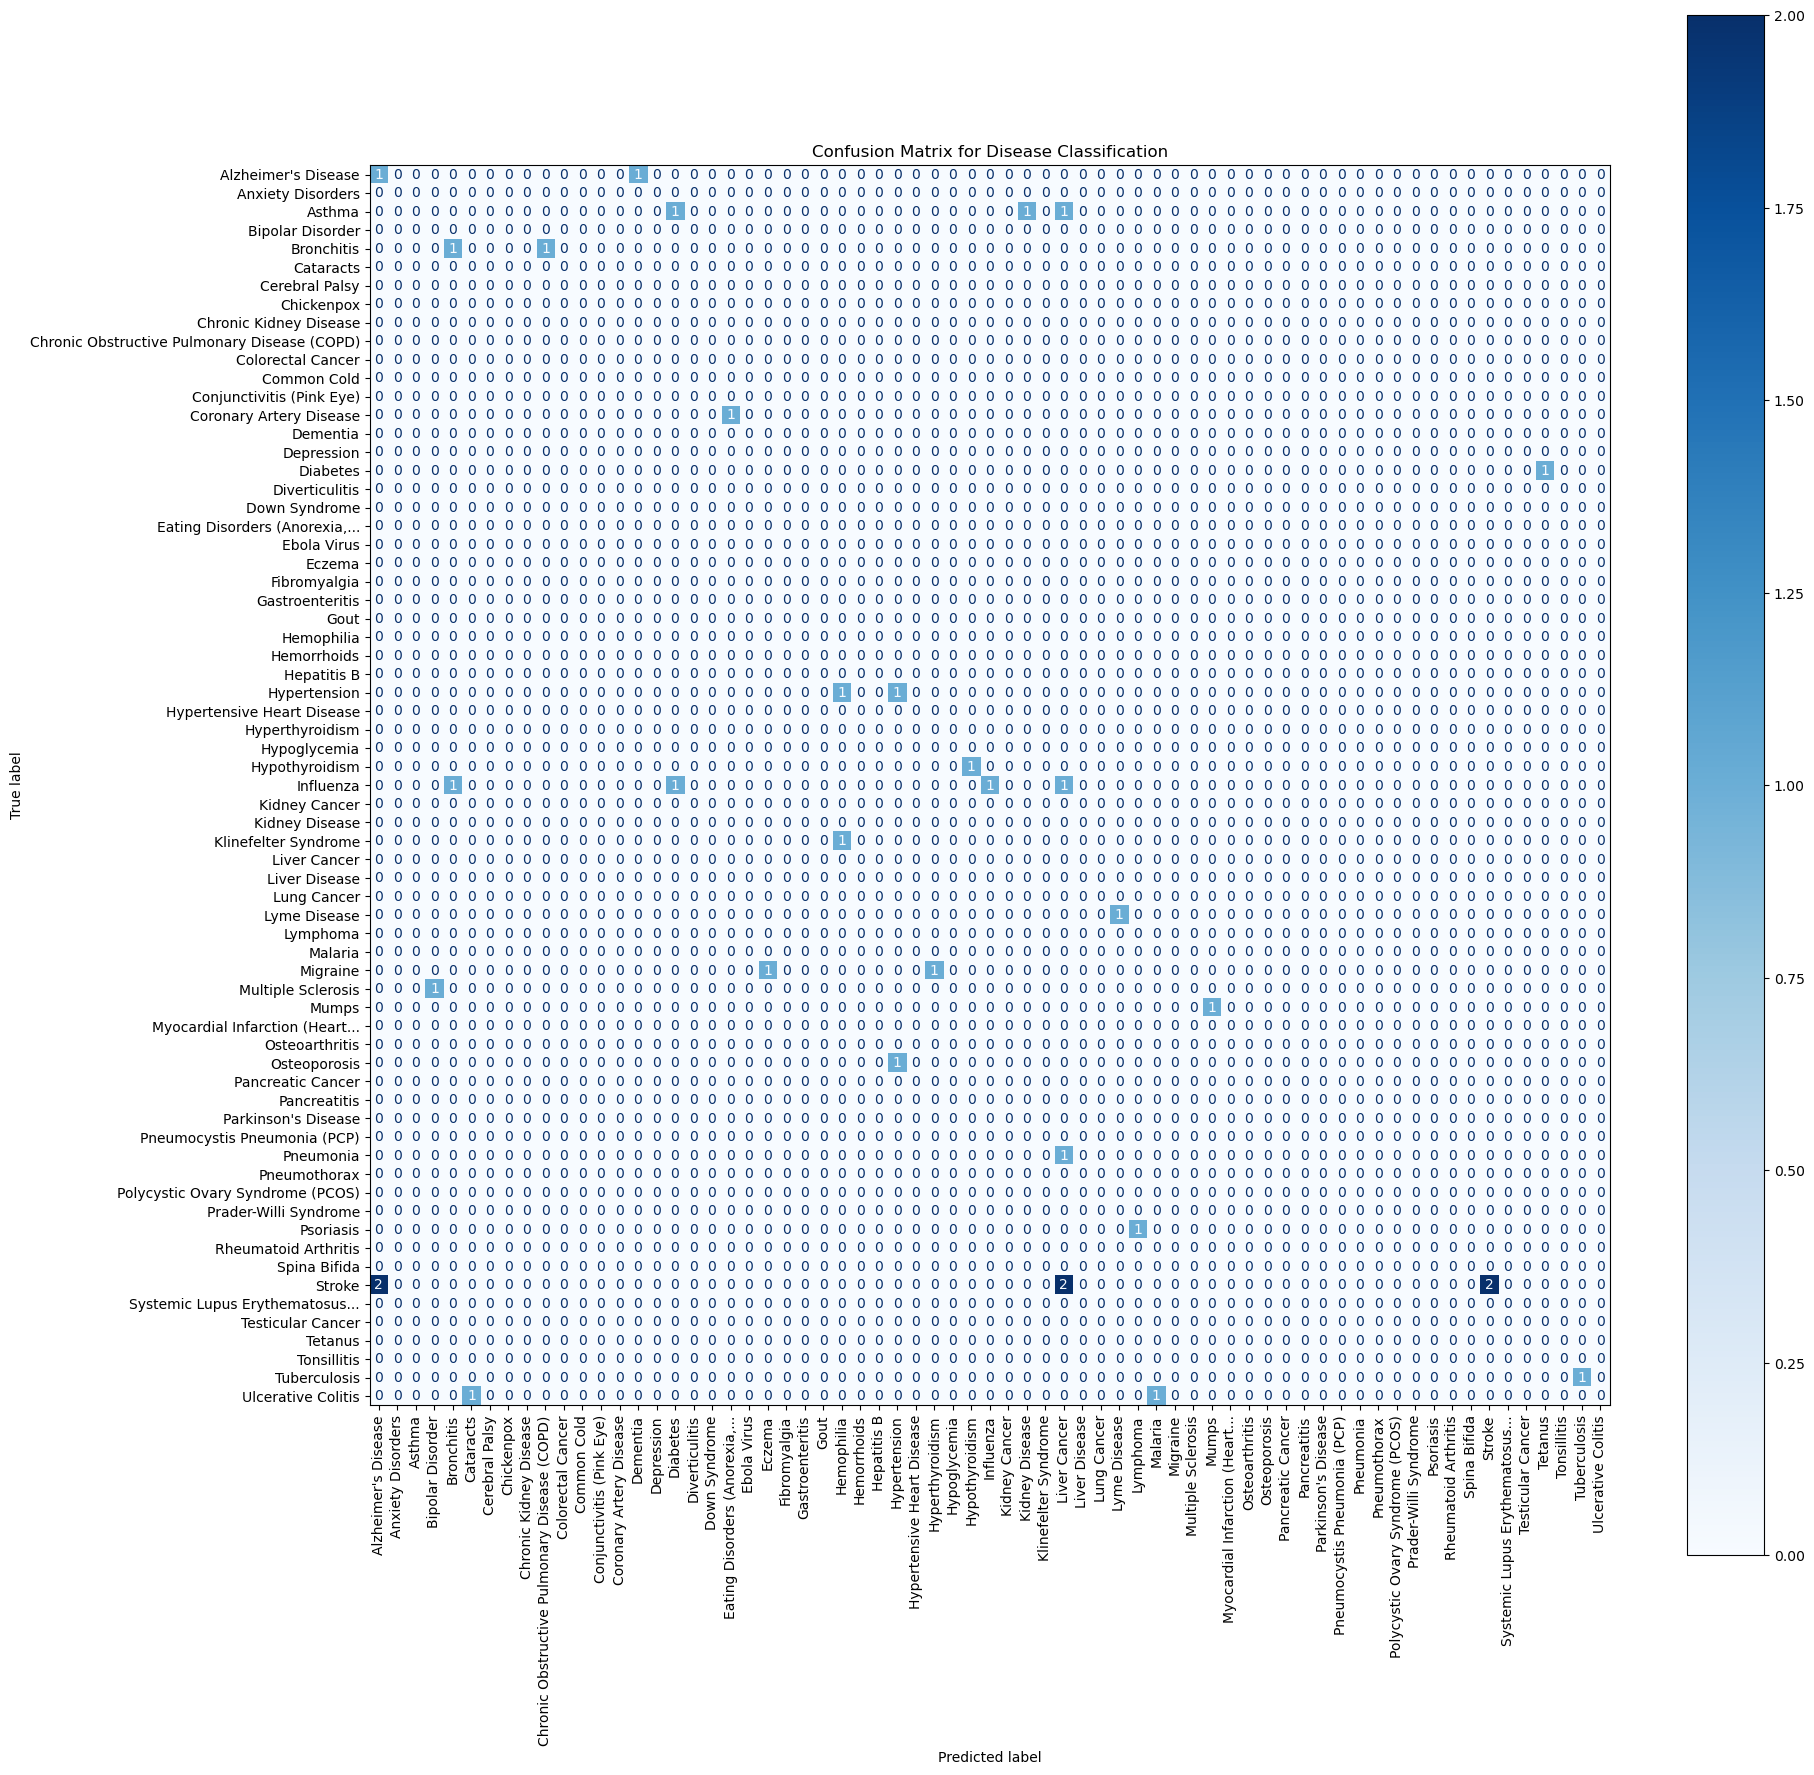

In [37]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
fig, ax = plt.subplots(figsize=(20, 20))
disp.plot(ax=ax, xticks_rotation=90, cmap='Blues')
plt.title("Confusion Matrix for Disease Classification")
plt.show()

In [38]:
cm.diagonal()

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1,
       0])

In [43]:
print(classification_report(y_test, y_pred, zero_division=np.nan))

                                              precision    recall  f1-score   support

                           Allergic Rhinitis        nan      0.00      0.00         1
                         Alzheimer's Disease       0.33      0.50      0.40         2
                           Anxiety Disorders       0.00       nan      0.00         0
                                      Asthma        nan      0.00      0.00         3
                            Bipolar Disorder       0.00       nan      0.00         0
                                  Bronchitis       0.50      0.50      0.50         2
                                   Cataracts       0.00       nan      0.00         0
Chronic Obstructive Pulmonary Disease (COPD)       0.00       nan      0.00         0
                                   Cirrhosis        nan      0.00      0.00         1
                     Coronary Artery Disease        nan      0.00      0.00         1
                             Crohn's Disease        n

In [39]:
import pickle

In [44]:
pickle.dump(model, open('../ai_model/disease_diagnosis_model', 'wb'))

In [45]:
df_positive.dtypes

Disease                 object
Fever                     bool
Cough                     bool
Fatigue                   bool
Difficulty Breathing      bool
Age                      int64
Gender                   int64
Blood Pressure           int64
Cholesterol Level        int64
Outcome Variable        object
dtype: object